In [1]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wget
pd.options.display.float_format = '{:,.4f}'.format

In [4]:
# Getting the data:

wget.download('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

'housing (1).csv'

In [5]:
# Opening File:

df = pd.read_csv('housing.csv')
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
# Fixing df's text

df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
# number of columns:
len(df.columns)

10

# EDA:

In [8]:
# Exploring the dataframe:

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.2300,37.8800,41.0000,880.0000,129.0000,322.0000,126.0000,8.3252,"452,600.0000",near_bay
1,-122.2200,37.8600,21.0000,"7,099.0000","1,106.0000","2,401.0000","1,138.0000",8.3014,"358,500.0000",near_bay
2,-122.2400,37.8500,52.0000,"1,467.0000",190.0000,496.0000,177.0000,7.2574,"352,100.0000",near_bay
3,-122.2500,37.8500,52.0000,"1,274.0000",235.0000,558.0000,219.0000,5.6431,"341,300.0000",near_bay
4,-122.2500,37.8500,52.0000,"1,627.0000",280.0000,565.0000,259.0000,3.8462,"342,200.0000",near_bay
...,...,...,...,...,...,...,...,...,...,...
20635,-121.0900,39.4800,25.0000,"1,665.0000",374.0000,845.0000,330.0000,1.5603,"78,100.0000",inland
20636,-121.2100,39.4900,18.0000,697.0000,150.0000,356.0000,114.0000,2.5568,"77,100.0000",inland
20637,-121.2200,39.4300,17.0000,"2,254.0000",485.0000,"1,007.0000",433.0000,1.7000,"92,300.0000",inland
20638,-121.3200,39.4300,18.0000,"1,860.0000",409.0000,741.0000,349.0000,1.8672,"84,700.0000",inland


In [9]:
# descriptive statistics:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,"20,640.0000","20,640.0000","20,640.0000","20,640.0000","20,433.0000","20,640.0000","20,640.0000","20,640.0000","20,640.0000",20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1h_ocean
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.5697,35.6319,28.6395,"2,635.7631",537.8706,"1,425.4767",499.5397,3.8707,"206,855.8169",NaN
std,2.0035,2.1360,12.5856,"2,181.6153",421.3851,"1,132.4621",382.3298,1.8998,"115,395.6159",NaN
min,-124.3500,32.5400,1.0000,2.0000,1.0000,3.0000,1.0000,0.4999,"14,999.0000",NaN
25%,-121.8000,33.9300,18.0000,"1,447.7500",296.0000,787.0000,280.0000,2.5634,"119,600.0000",NaN
50%,-118.4900,34.2600,29.0000,"2,127.0000",435.0000,"1,166.0000",409.0000,3.5348,"179,700.0000",NaN
75%,-118.0100,37.7100,37.0000,"3,148.0000",647.0000,"1,725.0000",605.0000,4.7432,"264,725.0000",NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
# median of population:
df.population.median()

1166.0

In [13]:
# fill na with mean or zero?

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

check = ['longitude',	'latitude',	'housing_median_age',	'total_rooms',	
         'total_bedrooms',	'population',	'households', 'median_income']

def prepare_X(df, fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

mean = df_train.total_bedrooms.mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

print(np.round(rmse(y_val, y_mean_pred_val),2))

X_null_train = prepare_X(df_train, fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

X_null_val = prepare_X(df_val, fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

print(np.round(rmse(y_val, y_null_pred_val),2))

0.33
0.33


In [14]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

remse_list = []
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),10)
    print(r, w_0, rmse_val)
    remse_list.append(rmse_val)

0 -11.686975242036546 0.3295330365
1e-06 -11.686959175728921 0.3295330362
0.0001 -11.685368865034667 0.329533001
0.001 -11.670931317799797 0.3295327039
0.01 -11.528493585632091 0.3295319366
0.1 -10.274500282195673 0.3296947205
1 -4.920480897742212 0.333788722
5 -1.482095745621172 0.3392485346
10 -0.7899311831779245 0.3406063808


In [15]:
remse_min = 10
count = 0
for i in remse_list:
  count += 1
  if i < remse_min:
    remse_min = i

print(remse_min, remse_list.index(remse_min), [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10][remse_list.index(remse_min)])

0.3295319366 4 0.01


In [16]:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 -11.900382138125133 0.34
1 -11.732757372921618 0.34
2 -11.806729361193014 0.33
3 -11.587900347753235 0.34
4 -11.38947058831824 0.34
5 -11.447114275587968 0.34
6 -11.370516351548385 0.35
7 -12.47344891889502 0.34
8 -11.800287429792748 0.35
9 -11.459046830736924 0.34


In [17]:
np.std(rmse_list)

0.005385164807134491

In [18]:
n = len(df)

n_test = int(0.2 * n)
n_train = n - (n_test)

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_test = df_shuffled.iloc[n_train:].copy()

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

X_null_train = prepare_X(df_train, fillna_value=0)
X_null_test = prepare_X(df_test, fillna_value=0)

y_train_orig = df_train.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_test = np.log1p(y_test_orig)

del df_train['median_house_value']
del df_test['median_house_value']

check = ['longitude',	'latitude',	'housing_median_age',	'total_rooms',	
         'total_bedrooms',	'population',	'households', 'median_income']

w_0, w = train_linear_regression_reg(X_null_train, y_train, r=0.001)
y_null_reg_test = w_0 + X_null_test.dot(w)
rmse_val = np.round(rmse(y_test, y_null_reg_test),2)

print(rmse_val)

0.35


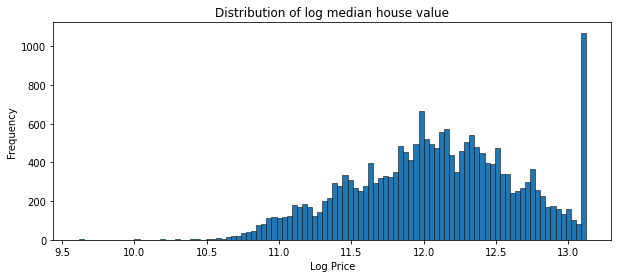

In [19]:
df['median_house_value_log'] = np.log1p(df['median_house_value'])

plt.figure(figsize=(10, 4))

sns.histplot(df['median_house_value_log'], bins=100, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log Price')
plt.title('Distribution of log median house value')

plt.show()